## MACHINE LEARNING 1,2,3,4,5 & 6##
 
#### MACHINE LEARNING 1 to 6: Assignment ####

### Problem Statement: Machine Learning 4

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

#### Loading Data and modules

In [1]:
# import numpy as np
# import pandas as pd
# import seaborn as sb
# import matplotlib.pyplot as plt
# import sklearn
# from pandas import Series, DataFrame
# from pylab import rcParams
# from sklearn import preprocessing
# from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics
# from sklearn.metrics import classification_report

# Url=  https://raw.githubusercontent.com/BigDataGal/Python-for-DataScience/master/titanic-train.csv
# titanic = pd.read_csv(url)

# titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch',' Ticket','Fare','Cabin','E mbarked']

# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import pydotplus
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Shape:", titanic.shape)
print("Size:", titanic.size)

Shape: (891, 12)
Size: 10692


In [6]:
print("Null Error Rate:", format(titanic['Survived'].mean() * 100, '.2f'), '%')

Null Error Rate: 38.38 %


The overall probability of survival is low

In [7]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Probability of survival is higher for 1st class passengers (63%) compared to those in 2nd class (47%) and 3rd class (24%)

In [8]:
class_sex_grouping = titanic.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

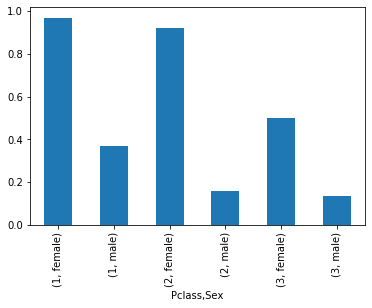

In [9]:
class_sex_grouping['Survived'].plot.bar()
plt.show()

Females are likely to survive more in each class

Data Preparation: We will use Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents / children en board), and Fare to predict whether a passenger survived

In [10]:
titanic = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [11]:
titanic.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Survived    False
dtype: bool

In [12]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# Replace NAN in Age column
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [14]:
# Counting the passengers basis their gender
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
# Mapping Sex
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [16]:
# The columns that we will be making predictions with
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# The column that we will be making predictions on
y = titanic['Survived']

In [17]:
# Split data randomly nto 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
predicted = model2.predict(X_test)
print("Accuracy for test data set is", format(metrics.accuracy_score(y_test, predicted) * 100, '.2f'), '%.')

Accuracy for test data set is 80.97 %.


In [20]:
param_test1 = { 'max_depth': range(2, 5), 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 3] }
grid_result = GridSearchCV(DecisionTreeClassifier(), param_grid=param_test1, cv=10, n_jobs=-1, verbose=1)
grid_result.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s


Best: 0.820225 using {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    5.2s finished


In [21]:
predicted = grid_result.predict(X_test)
print("Accuracy for test data set is", format(metrics.accuracy_score(y_test, predicted) * 100, '.2f'), '%.')

Accuracy for test data set is 82.46 %.


In [22]:
dot_data = tree.export_graphviz(grid_result.best_estimator_, out_file=None, filled=True, rounded=True, feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Lets predict the chances of survival for a 3 year old boy travelling in second class with parents

In [23]:
grid_result.predict_proba(np.array([[2, 1, 3, 0, 2, 0.0]]))

array([[0.05882353, 0.94117647]])

 Probability of the boy surviving is 94%